In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as PrePr
from scipy.stats import pearsonr

# Importing dataframes from my preprocessing
from preProcessing_BryanDavison import (bottom_10_question_8,
                           top_10_question_8,
                           GDP_top,
                           GDP_bottom,
                           inflation_top,
                           inflation_bottom,
                           exports_top,
                           exports_bottom,
                           income_top,
                           income_bottom)

sns.set(color_codes=True)
sns.set_style("darkgrid")

# Setting the index of both dataframes to Country Name
top_10_question_8 = top_10_question_8.set_index("Country Name",append=True)
bottom_10_question_8 = bottom_10_question_8.set_index("Country Name",append=True)

In [62]:
def flattenDf(dataframe):
    newDf = dataframe.copy()
    newDf = newDf.stack(dropna=False)
    return newDf

def transformColumns(dataframe):
    newDf = dataframe.copy()
    pt = PrePr.PowerTransformer(method='yeo-johnson', standardize=False)
    trans = pt.fit_transform(dataframe)
    newDf = pd.DataFrame(trans,index=dataframe.index,columns=dataframe.columns)
    return newDf


# Question 8

### Of the top 10 HDI rankings, compare Domestic private health expenditure per capita and Domestic general government health expenditure per capita of each country. What countries have the most expensive healthcare? 

### *Tidying Data Up*

In [35]:
# Stacking both dataframes
top_10_question_8_flat = flattenDf(top_10_question_8)
bottom_10_question_8_flat = flattenDf(bottom_10_question_8)


priv_label = "Domestic private health expenditure per capita (current US$)"
gov_label = "Domestic general government health expenditure per capita (current US$)"



#***************************************************************#



# Manipulating the top countries dataframe for optimal format

# Converting the the stacked dataframe into a datarame based off the stacked data
top_Countries_8 = pd.concat([top_10_question_8_flat], axis=1)

# Swapping the indexes so the Country Name determines the index
top_Countries_8 = top_Countries_8.swaplevel(1,2)

# Sorting the dataframe by Country Name/Indicator Code and resetting it to Country Name/Year
top_Countries_8 = top_Countries_8.reset_index() \
    .sort_values(by=["Country Name","Indicator Code"]) \
    .set_index(["Country Name","level_3"])

# Sorting the dataframe by Indicator Code
top_Countries_8 = top_Countries_8.sort_values(by=["Indicator Code"])

# Pivoting the datarame so the Indicators are columns and the years are rows
top_Countries_8 = top_Countries_8 \
    .pivot_table(values=0,index=top_Countries_8.index, columns='Indicator Code',aggfunc='first')\
    .reset_index()

# Converting the column of tuples (Country, Year) to their own columns
top_Countries_8["Country"],top_Countries_8["Year"] = top_Countries_8["index"].str
top_Countries_8.reset_index(inplace=True, drop=True)

# Removing the index
top_Countries_8 = top_Countries_8.drop(["index"], axis=1)

# Setting the Index to Country Name/Year
top_Countries_8 = top_Countries_8.set_index(["Country","Year"])

# Fixing the Column names
top_Countries_8.set_axis(["HDI", gov_label, priv_label], axis=1, inplace=True)

# Removing the extra column with no data
top_Countries_8 = top_Countries_8[top_Countries_8.index.get_level_values("Year") != "Unnamed: 63"]

# Removing HDI column
top_Countries_8 = top_Countries_8.drop(["HDI"], axis=1)



#***************************************************************#



# Conducting the same process as above for the bottom countries

bottom_Countries_8 = pd.concat([bottom_10_question_8_flat], axis=1)

bottom_Countries_8 = bottom_Countries_8.swaplevel(1,2)

bottom_Countries_8 = bottom_Countries_8.reset_index() \
    .sort_values(by=["Country Name","Indicator Code"]) \
    .set_index(["Country Name","level_3"])

bottom_Countries_8 = bottom_Countries_8.sort_values(by=["Indicator Code"])

bottom_Countries_8 = bottom_Countries_8 \
    .pivot_table(values=0, index=bottom_Countries_8.index,columns='Indicator Code', aggfunc='first') \
    .reset_index()

bottom_Countries_8["Country"],bottom_Countries_8["Year"] = bottom_Countries_8["index"].str

bottom_Countries_8.reset_index(inplace=True, drop=True)

bottom_Countries_8 = bottom_Countries_8.drop(["index"], axis=1)

bottom_Countries_8 = bottom_Countries_8.set_index(["Country","Year"])

bottom_Countries_8.set_axis(["HDI", gov_label, priv_label], axis=1, inplace=True)

bottom_Countries_8 = bottom_Countries_8[bottom_Countries_8.index.get_level_values("Year") != "Unnamed: 63"]

bottom_Countries_8 = bottom_Countries_8.drop(["HDI"], axis=1)



# *********************************************************** #



# Creating lists of the top/bottom country names
top_country_names = top_Countries_8.index.get_level_values("Country")
bottom_country_names = bottom_Countries_8.index.get_level_values("Country")

# Adding a column of country names to the top countries dataframe
c = {"Country Name" : top_country_names}
top_Countries_8 = top_Countries_8.assign(**c)

# Removing duplicate Hong Kong row with no data
top_Countries_8 = top_Countries_8.loc[top_Countries_8.index.get_level_values("Country") != "Hong Kong"]

# Adding a column of country names to the bottom countries dataframe
c = {"Country Name" : bottom_country_names}
bottom_Countries_8 = bottom_Countries_8.assign(**c)


# Transforming the data of both bottom/top countries
top_Countries_8.iloc[:,:-1] = transformColumns(top_Countries_8.iloc[:,:-1])
bottom_Countries_8.iloc[:,:-1] = transformColumns(bottom_Countries_8.iloc[:,:-1])


display(top_Countries_8.head(18))
display(bottom_Countries_8.head(18))

Domestic general government health expenditure per capita (current US$)  \
Country   Year                                                                                       
Australia 2000                                                     60.640328                         
          2001                                                     58.963601                         
          2002                                                     63.160760                         
          2003                                                     70.923598                         
          2004                                                     78.849057                         
          2005                                                     82.327401                         
          2006                                                     84.605976                         
          2007                                                     93.095427                         
          2008                                                     96.408987                         
          2009                                                     95.536501                         
          2010                                                    105.766786                         
          2011                                                    115.613613                         
          2012                                                    115.843157                         
          2013                                                    113.857917                         
          2014                                                    111.739057                         
          2015                                                    104.749564                         
          2016                                                    106.037912                         
          HDI Rank (2017)                                           1.980254                         

                           Domestic private health expenditure per capita (current US$)  \
Country   Year                                                                            
Australia 2000                                                     40.346392              
          2001                                                     39.796447              
          2002                                                     41.793931              
          2003                                                     47.602138              
          2004                                                     52.589612              
          2005                                                     54.846954              
          2006                                                     56.495028              
          2007                                                     60.753256              
          2008                                                     63.379647              
          2009                                                     62.368762              
          2010                                                     70.133752              
          2011                                                     75.654568              
          2012                                                     78.780208              
          2013                                                     77.400979              
          2014                                                     76.293811              
          2015                                                     70.146047              
          2016                                                     70.848685              
          HDI Rank (2017)                                           1.974596              

                          Country Name  
Country   Year                          
Australia 2000               Australia  
          2001               Australia  
 

Domestic general government health expenditure per capita (current US$)  \
Country      Year                                                                                       
Burkina Faso 2000                                                      1.084355                         
             2001                                                      1.114654                         
             2002                                                      1.213357                         
             2003                                                      1.305953                         
             2004                                                      1.676183                         
             2005                                                      1.543881                         
             2006                                                      1.649832                         
             2007                                                      1.717621                         
             2008                                                      1.789164                         
             2009                                                      1.873942                         
             2010                                                      1.772193                         
             2011                                                      1.875034                         
             2012                                                      1.746719                         
             2013                                                      1.989102                         
             2014                                                      1.996754                         
             2015                                                      1.835976                         
             2016                                                      2.120751                         
             HDI Rank (2017)                                           3.101045                         

                              Domestic private health expenditure per capita (current US$)  \
Country      Year                                                                            
Burkina Faso 2000                                                      1.490926              
             2001                                                      1.520167              
             2002                                                      1.535593              
             2003                                                      1.669773              
             2004                                                      1.907801              
             2005                                                      1.947049              
             2006                                                      2.069784              
             2007                                                      2.212250              
             2008                                                      2.393285              
             2009                                                      2.514561              
             2010                                                      2.499697              
             2011                                                      2.606921              
             2012                                                      2.597085              
             2013                                                      2.845759              
             2014                                                      2.814931              
             2015                                                      2.693701              
             2016                                                      2.745194              
             HDI Rank (2017)                                           5.135039              

                              Country Name  
Cou

# Analyzing Data

### Highest Ranking Countries

C:\Users\Nayrb\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


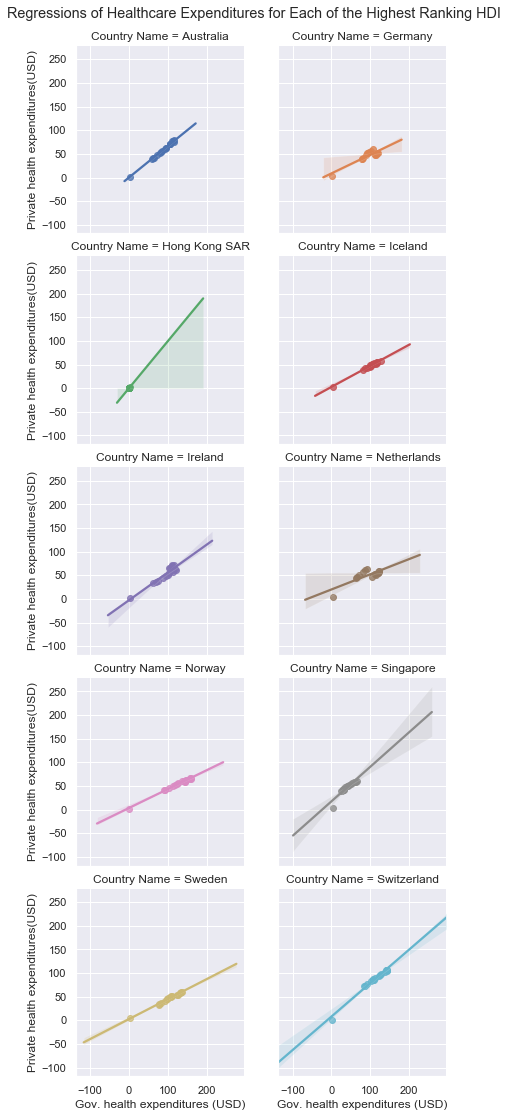

In [36]:
xy = sns.lmplot(x=gov_label,y=priv_label,
                data=top_Countries_8, hue="Country Name", col="Country Name",
                col_wrap=2,height=3)
xy.fig.suptitle("Regressions of Healthcare Expenditures for Each of the Highest Ranking HDI", y=1.02)
xy.set_axis_labels("Gov. health expenditures (USD)","Private health expenditures(USD)")


C:\Users\Nayrb\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1741: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


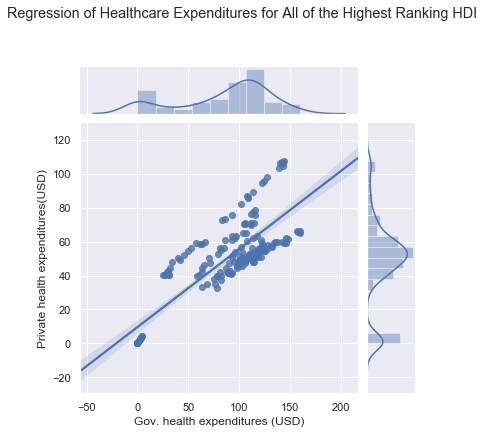

In [37]:
xy = sns.jointplot(x=gov_label,y=priv_label,
                data=top_Countries_8, kind='reg')
xy.fig.suptitle("Regression of Healthcare Expenditures for All of the Highest Ranking HDI", y=1.02)
xy.set_axis_labels("Gov. health expenditures (USD)","Private health expenditures(USD)")


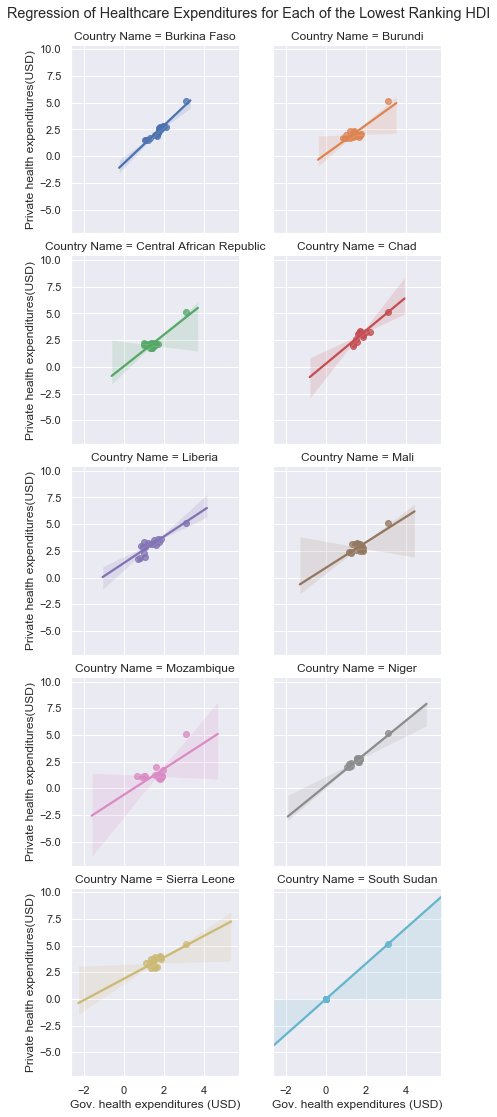

In [38]:

xy = sns.lmplot(x=gov_label,y=priv_label,
                data=bottom_Countries_8, hue="Country Name", col="Country Name",
                col_wrap=2,height=3)
xy.fig.suptitle("Regression of Healthcare Expenditures for Each of the Lowest Ranking HDI", y=1.02)
xy.set_axis_labels("Gov. health expenditures (USD)","Private health expenditures(USD)")


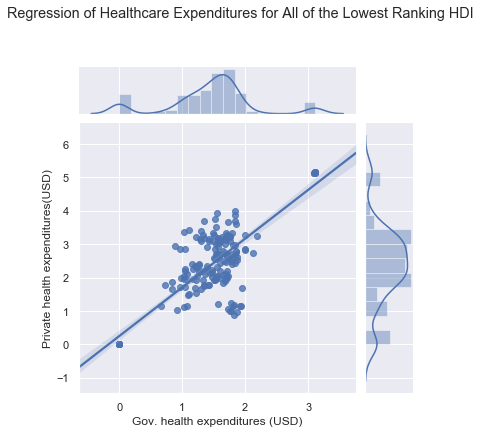

In [39]:
xy = sns.jointplot(x=gov_label,y=priv_label,
                data=bottom_Countries_8, kind='reg')
xy.fig.suptitle("Regression of Healthcare Expenditures for All of the Lowest Ranking HDI", y=1.02)
xy.set_axis_labels("Gov. health expenditures (USD)","Private health expenditures(USD)")

Text(0, 0.5, 'Private health expenditures(USD)')

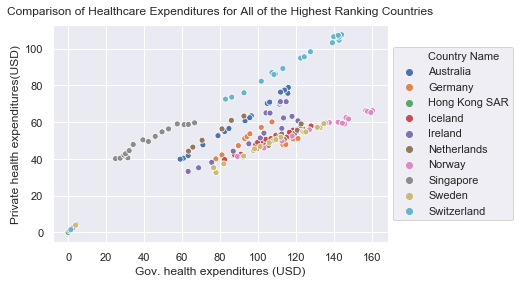

In [40]:
xy = sns.scatterplot(x=gov_label,y=priv_label,
                data=top_Countries_8, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of Healthcare Expenditures for All of the Highest Ranking Countries", y=1.02)
plt.xlabel("Gov. health expenditures (USD)")
plt.ylabel("Private health expenditures(USD)")

Text(0, 0.5, 'Private health expenditures(USD)')

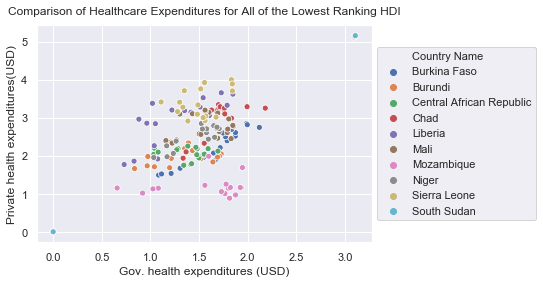

In [41]:
xy = sns.scatterplot(x=gov_label,y=priv_label,
                data=bottom_Countries_8, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of Healthcare Expenditures for All of the Lowest Ranking HDI", y=1.02)
plt.xlabel("Gov. health expenditures (USD)")
plt.ylabel("Private health expenditures(USD)")

# Question 10

### What variables outside the Human Development Index (HDI) also affect economic growth?

### *Tidying Data*

In [63]:
# Stacking all data frames and creating labels for their repsective indicators

GDP_top_flat = flattenDf(GDP_top)
GDP_bottom_flat = flattenDf(GDP_bottom)
GDP_label = "GDP per capita growth (annual %)"

inflation_top_flat = flattenDf(inflation_top)
inflation_bottom_flat = flattenDf(inflation_bottom)
inflation_label = "Inflation, consumer prices (annual %)"

exports_top_flat = flattenDf(exports_top)
exports_bottom_flat = flattenDf(exports_bottom)
exports_label = "Exports of goods and services (annual % growth)"

income_top_flat = flattenDf(income_top)
income_bottom_flat = flattenDf(income_bottom)
income_label = "Adjusted net national income (annual % growth)"



#***************************************************************#



# Combining all stacked dataframes into one
top_Countries_10 = pd.concat([GDP_top_flat,exports_top_flat,income_top_flat,inflation_top_flat], axis=1)

# Swapping the Index levels
top_Countries_10 = top_Countries_10.swaplevel(0,1)

# Sorting by and setting the index to Country Name/Year
top_Countries_10 = top_Countries_10.reset_index() \
    .sort_values(by=["level_0","level_1"]) \
    .set_index(["level_0","level_1"])

# Fixing Column Names
top_Countries_10.set_axis([GDP_label,exports_label,income_label,inflation_label], axis=1, inplace=True)

# Renaming index levels
top_Countries_10.index.rename("Country",level=0,inplace=True)
top_Countries_10.index.rename("Year",level=1,inplace=True)



#***************************************************************#



# Conducting the same process as above for the bottom countries

bottom_Countries_10 = pd.concat([GDP_bottom_flat,exports_bottom_flat,income_bottom_flat,inflation_bottom_flat], axis=1)

bottom_Countries_10 = bottom_Countries_10.swaplevel(0,1).reset_index()

bottom_Countries_10 = bottom_Countries_10.sort_values(by=["Country Name", "level_1"]) \
    .set_index(["Country Name","level_1"])

bottom_Countries_10.set_axis([GDP_label,exports_label,income_label, inflation_label], axis=1, inplace=True)

bottom_Countries_10.index.rename("Country",level=0,inplace=True)

bottom_Countries_10.index.rename("Year",level=1,inplace=True)



#***************************************************************#



# Creating lists of the top/bottom country names
top_country_names = top_Countries_10.index.get_level_values("Country")
bottom_country_names = bottom_Countries_10.index.get_level_values("Country")

# Adding a column of country names to the top countries dataframe
c = {"Country Name" : top_country_names}
top_Countries_10 = top_Countries_10.assign(**c)

# Adding a column of country names to the bottom countries dataframe
c = {"Country Name" : bottom_country_names}
bottom_Countries_10 = bottom_Countries_10.assign(**c)


# Transforming the data of both bottom/top countries
top_Countries_10.iloc[:,:-1] = transformColumns(top_Countries_10.iloc[:,:-1])
bottom_Countries_10.iloc[:,:-1] = transformColumns(bottom_Countries_10.iloc[:,:-1])



display(top_Countries_10.head(30))

display(bottom_Countries_10.head())


GDP per capita growth (annual %)  \
Country   Year                                     
Australia 1990                          1.962136   
          1991                         -1.707948   
          1992                         -0.783787   
          1993                          2.871648   
          1994                          2.740777   
          1995                          2.463221   
          1996                          2.407874   
          1997                          2.672766   
          1998                          3.298009   
          1999                          3.600446   
          2000                          2.581967   
          2001                          0.559509   
          2002                          2.609674   
          2003                          1.662020   
          2004                          2.665884   
          2005                          1.769658   
          2006                          1.289548   
          2007                          2.967810   
          2008                          1.547562   
          2009                         -0.157168   
          2010                          0.471714   
          2011                          1.012269   
          2012                          2.009546   
          2013                          0.869013   
          2014                          1.014757   
          2015                          0.869604   
          2016                          1.199607   
          2017                          0.252621   
Germany   1990                          4.076691   
          1991                          4.070903   

                Exports of goods and services (annual % growth)  \
Country   Year                                                    
Australia 1990                                         4.572659   
          1991                                        10.894557   
          1992                                         9.174599   
          1993                                         7.214045   
          1994                                         9.206943   
          1995                                         4.324681   
          1996                                         9.656651   
          1997                                        10.538961   
          1998                                         4.484957   
          1999                                         1.892924   
          2000                                         9.591868   
          2001                                         8.396132   
          2002                                        -0.550558   
          2003                                         0.496164   
          2004                                         1.278185   
          2005                                         3.398546   
          2006                                         2.924511   
          2007                                         4.061347   
          2008                                         3.932555   
          2009                                         2.371860   
          2010                                         4.600392   
          2011                                         0.854558   
          2012                                         4.508191   
          2013                                         5.185693   
          2014                                         5.812203   
          2015                                         6.610512   
          2016                                         6.690640   
          2017                                         5.353377   
Germany   1990                                        10.982544   
          1991                                        10.673545   

                Adjusted net national income (annual % growth)  \
Country   Year                                                   
Australia 1990                                        1.354268   
        

GDP per capita growth (annual %)  \
Country      Year                                     
Burkina Faso 1990                         -2.878883   
             1991                          7.285860   
             1992                         -2.218254   
             1993                          0.721086   
             1994                         -1.325553   

                   Exports of goods and services (annual % growth)  \
Country      Year                                                    
Burkina Faso 1990                                        18.948194   
             1991                                        -0.424374   
             1992                                       -16.878717   
             1993                                         5.642290   
             1994                                        25.726635   

                   Adjusted net national income (annual % growth)  \
Country      Year                                                   
Burkina Faso 1990                                       -0.166523   
             1991                                        6.056422   
             1992                                       -1.882681   
             1993                                        2.846448   
             1994                                       -9.466682   

                   Inflation, consumer prices (annual %)  Country Name  
Country      Year                                                       
Burkina Faso 1990                              -0.568952  Burkina Faso  
             1991                               1.514367  Burkina Faso  
             1992                              -2.868143  Burkina Faso  
             1993                               0.487844  Burkina Faso  
             1994                               7.526950  Burkina Faso

# Analyzing Data

## Highest Ranking Countries

### *GPD Per Capita vs Consumer Inflation Growth*

C:\Users\Nayrb\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 1.04, 'GDP Per Capita vs. Consumer Inflation Growth of the Highest Ranking HDI')

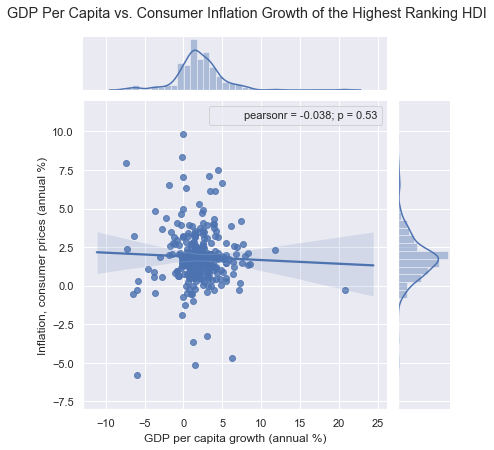

In [43]:
xy = sns.jointplot(x=GDP_label,y=inflation_label,data=top_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(GDP_label,inflation_label)
xy.fig.suptitle("GDP Per Capita vs. Consumer Inflation Growth of the Highest Ranking HDI", y=1.04)


### *GPD Per Capita vs Exports of Goods/Services*

Text(0.5, 1.04, 'GDP Per Capita vs. Exports of Goods/Services of the Highest Ranking HDI')

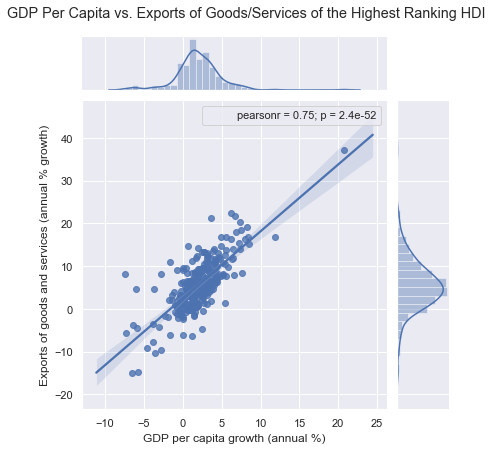

In [44]:
xy = sns.jointplot(x=GDP_label,y=exports_label,data=top_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(GDP_label,exports_label)
xy.fig.suptitle("GDP Per Capita vs. Exports of Goods/Services of the Highest Ranking HDI", y=1.04)


### *GPD Per Capita vs Adj. Net National Income*

Text(0.5, 1.04, 'GDP Per Capita vs. Adj. Net National Income of the Highest Ranking HDI')

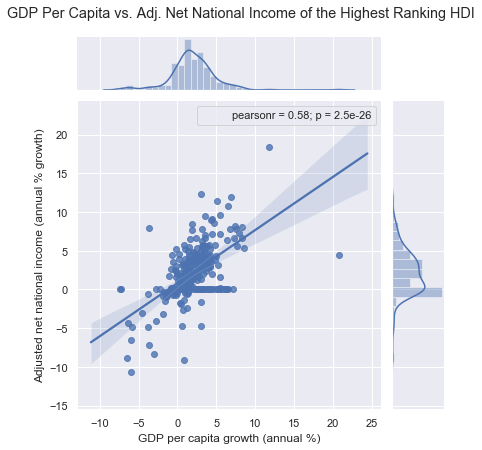

In [45]:
xy = sns.jointplot(x=GDP_label,y=income_label,data=top_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(GDP_label,income_label)
xy.fig.suptitle("GDP Per Capita vs. Adj. Net National Income of the Highest Ranking HDI", y=1.04)


### *Adj Net National Income vs Exports of Goods/Services*

Text(0.5, 1.04, 'Adj Net National Income vs Exports of Goods/Services of the Highest Ranking HDI')

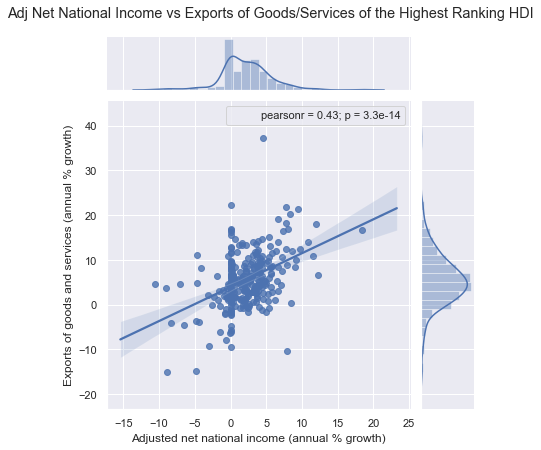

In [46]:
xy = sns.jointplot(x=income_label,y=exports_label,data=top_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(income_label,exports_label)
xy.fig.suptitle("Adj Net National Income vs Exports of Goods/Services of the Highest Ranking HDI", y=1.04)


### *Adj Net National Income vs Consumer Inflation Growth*

Text(0.5, 1.04, 'Adj Net National Income vs Consumer Inflation Growth of the Highest Ranking HDI')

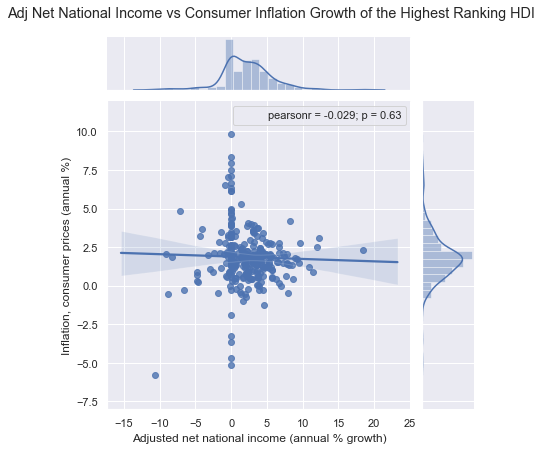

In [47]:
xy = sns.jointplot(x=income_label,y=inflation_label,data=top_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(income_label,inflation_label)
xy.fig.suptitle("Adj Net National Income vs Consumer Inflation Growth of the Highest Ranking HDI", y=1.04)


### *Exports of Goods/Services vs Consumer Inflation Growth*

Text(0.5, 1.04, 'Exports of Goods/Services vs Consumer Inflation Growth of the Highest Ranking HDI')

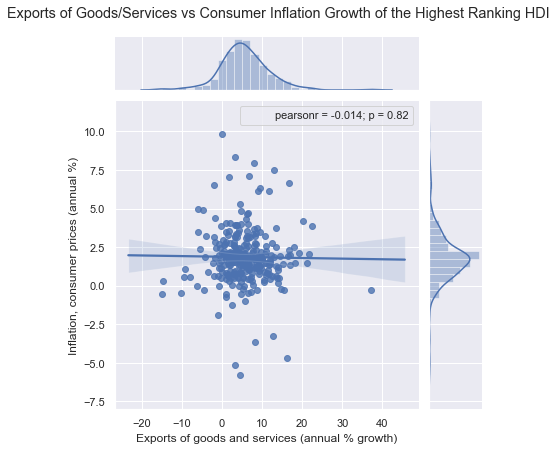

In [48]:
xy = sns.jointplot(x=exports_label,y=inflation_label,data=top_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(exports_label,inflation_label)
xy.fig.suptitle("Exports of Goods/Services vs Consumer Inflation Growth of the Highest Ranking HDI", y=1.04)


## Lowest Ranking Countries

### *GPD Per Capita vs Consumer Inflation Growth*

Text(0.5, 1.04, 'GDP Per Capita vs. Consumer Inflation Growth of the Lowest Ranking HDI')

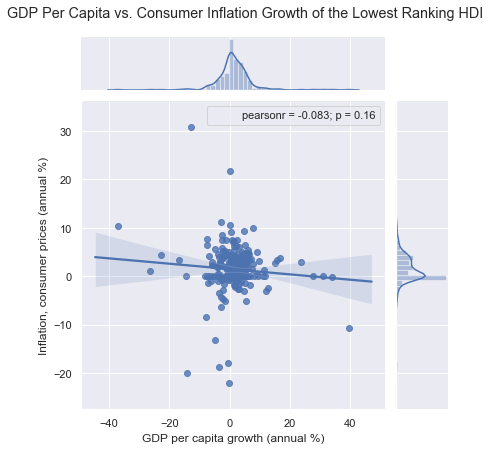

In [49]:
xy = sns.jointplot(x=GDP_label,y=inflation_label,data=bottom_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(GDP_label,inflation_label)
xy.fig.suptitle("GDP Per Capita vs. Consumer Inflation Growth of the Lowest Ranking HDI", y=1.04)


### *GPD Per Capita vs Exports of Goods/Services*

Text(0.5, 1.04, 'GDP Per Capita vs. Exports of Goods/Services of the Lowest Ranking HDI')

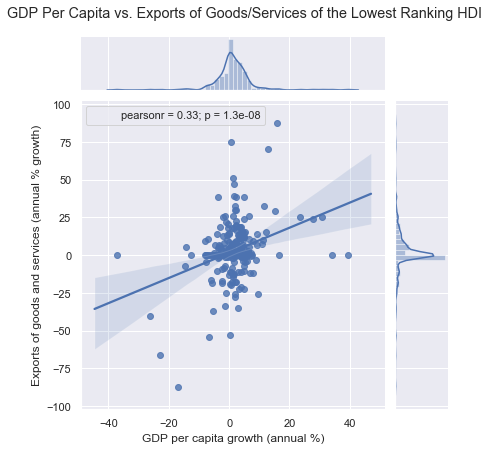

In [50]:
xy = sns.jointplot(x=GDP_label,y=exports_label,data=bottom_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(GDP_label,exports_label)
xy.fig.suptitle("GDP Per Capita vs. Exports of Goods/Services of the Lowest Ranking HDI", y=1.04)


### *GPD Per Capita vs Adj. Net National Income*

Text(0.5, 1.04, 'GDP Per Capita vs. Adj. Net National Income of the Lowest Ranking HDI')

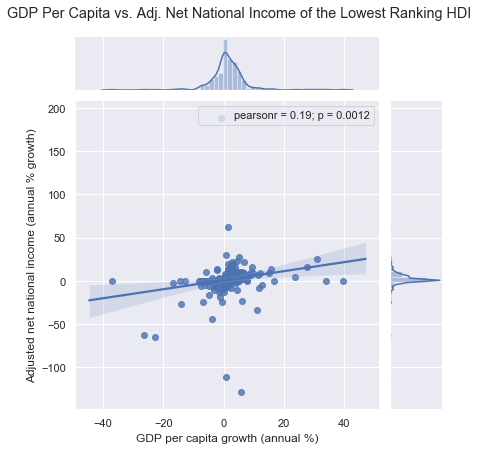

In [51]:
xy = sns.jointplot(x=GDP_label,y=income_label,data=bottom_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(GDP_label,income_label)
xy.fig.suptitle("GDP Per Capita vs. Adj. Net National Income of the Lowest Ranking HDI", y=1.04)


### *Adj Net National Income vs Exports of Goods/Services*

Text(0.5, 1.04, 'Adj Net National Income vs Exports of Goods/Services of the Lowest Ranking HDI')

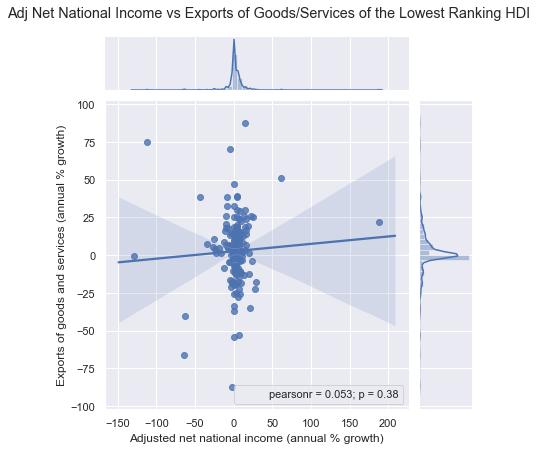

In [52]:
xy = sns.jointplot(x=income_label,y=exports_label,data=bottom_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(income_label,exports_label)
xy.fig.suptitle("Adj Net National Income vs Exports of Goods/Services of the Lowest Ranking HDI", y=1.04)


### *Adj Net National Income vs Consumer Inflation Growth*

Text(0.5, 1.04, 'Adj Net National Income vs Consumer Inflation Growth of the Lowest Ranking HDI')

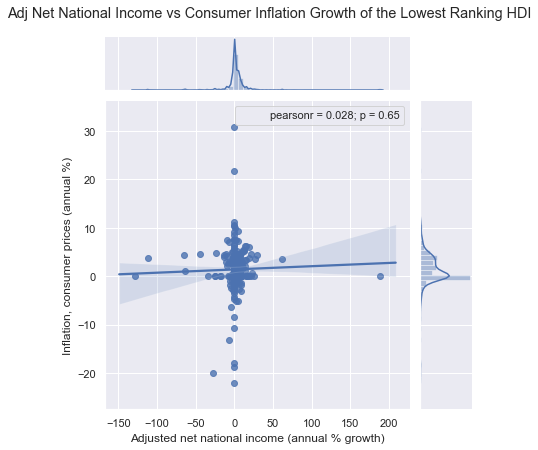

In [53]:
xy = sns.jointplot(x=income_label,y=inflation_label,data=bottom_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(income_label,inflation_label)
xy.fig.suptitle("Adj Net National Income vs Consumer Inflation Growth of the Lowest Ranking HDI", y=1.04)


### *Exports of Goods/Services vs Consumer Inflation Growth*

Text(0.5, 1.04, 'Exports of Goods/Services vs Consumer Inflation Growth of the Lowest Ranking HDI')

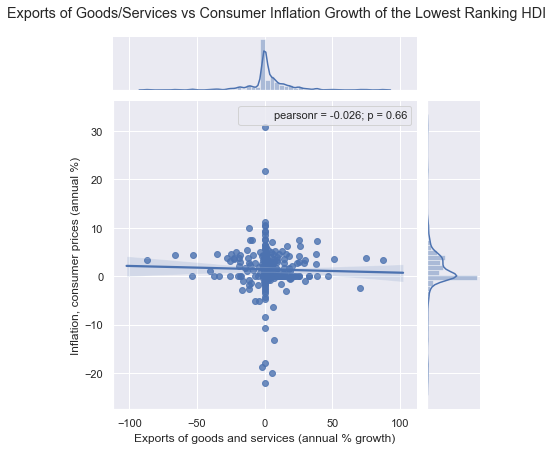

In [54]:
xy = sns.jointplot(x=exports_label,y=inflation_label,data=bottom_Countries_10.iloc[:,:-1], kind='reg', stat_func=pearsonr)
xy.set_axis_labels(exports_label,inflation_label)
xy.fig.suptitle("Exports of Goods/Services vs Consumer Inflation Growth of the Lowest Ranking HDI", y=1.04)


## Analyzing stronger/positive relationships further

### *Highest Ranking Countries*

Text(0, 0.5, 'Exports of goods/services (annual % growth)')

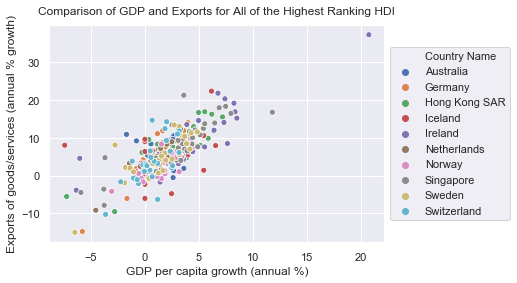

In [55]:
xy = sns.scatterplot(x=GDP_label,y=exports_label,
                data=top_Countries_10, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of GDP and Exports for All of the Highest Ranking HDI", y=1.02)
plt.ylabel("Exports of goods/services (annual % growth)")

Text(0, 0.5, 'Adj. Net National Income (annual %)')

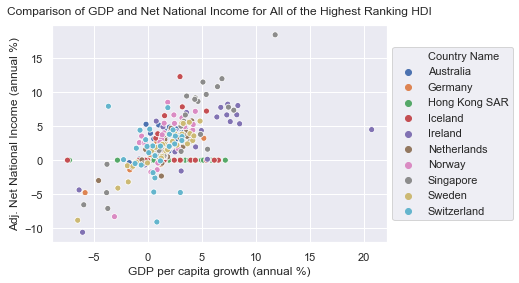

In [56]:
xy = sns.scatterplot(x=GDP_label,y=income_label,
                data=top_Countries_10, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of GDP and Net National Income for All of the Highest Ranking HDI", y=1.02)

plt.ylabel("Adj. Net National Income (annual %)")

Text(0, 0.5, 'Exports of goods/services (annual %)')

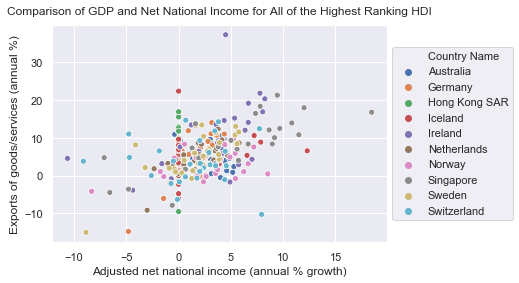

In [57]:
xy = sns.scatterplot(x=income_label,y=exports_label,
                data=top_Countries_10, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of GDP and Net National Income for All of the Highest Ranking HDI", y=1.02)
plt.ylabel("Exports of goods/services (annual %)")

### *Lowest Ranking Countries*

Text(0, 0.5, 'Exports of goods/services (annual %)')

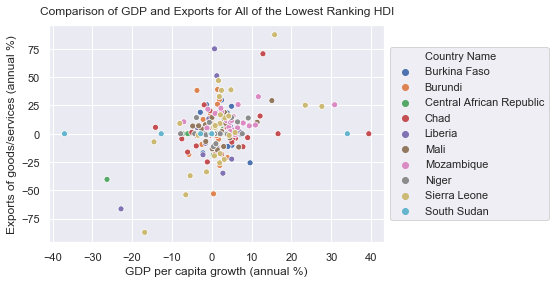

In [58]:
xy = sns.scatterplot(x=GDP_label,y=exports_label,
                data=bottom_Countries_10, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of GDP and Exports for All of the Lowest Ranking HDI", y=1.02)
plt.ylabel("Exports of goods/services (annual %)")

Text(0, 0.5, 'Adj. Net National Income (annual %)')

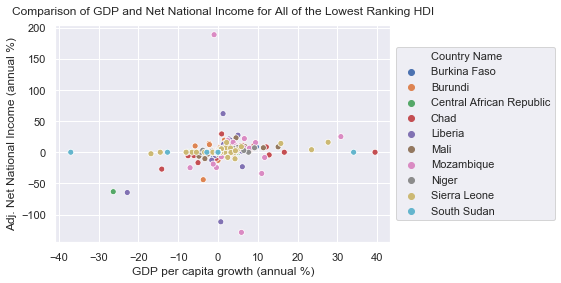

In [59]:
xy = sns.scatterplot(x=GDP_label,y=income_label,
                data=bottom_Countries_10, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of GDP and Net National Income for All of the Lowest Ranking HDI", y=1.02)
plt.ylabel("Adj. Net National Income (annual %)")

Text(0, 0.5, 'Exports of goods/services (annual %)')

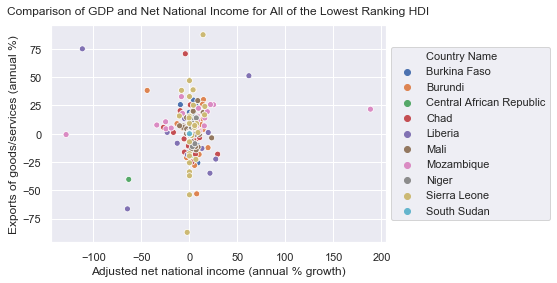

In [60]:
xy = sns.scatterplot(x=income_label,y=exports_label,
                data=bottom_Countries_10, hue="Country Name")

xy.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=1)
xy.set_title("Comparison of GDP and Net National Income for All of the Lowest Ranking HDI", y=1.02)
plt.ylabel("Exports of goods/services (annual %)")